**Dataset exploration**

Explore the In-shop Clothes Retrieval Benchmark of the 
DeepFashion dataset
http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion/InShopRetrieval.html

Import the dataset in Google Colab instead of downloading the whole dataset locally

Visualize some samples from the dataset

Look for variations and correlations in the dataset

Use the matplotlib and seaborn library to visualize data

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.image as matimg


In [3]:
!git clone https://github.com/Shakshi17012/3d-pose-warping.git

Cloning into '3d-pose-warping'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Source='/content/drive/My Drive/In-shop Clothes Retrieval Benchmark/Img'

In [6]:
#os.listdir(Source)

In [7]:
from zipfile import ZipFile
file_name='/content/drive/My Drive/In-shop Clothes Retrieval Benchmark/Img/img.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()

In [8]:
# new_source='/content/img'
# os.listdir(new_source)

In [9]:
from google.colab.patches import cv2_imshow
image=cv2.imread('/content/img/MEN/Denim/id_00000089/02_7_additional.jpg')
i1=np.array(image)
print(i1.shape)
#cv2_imshow(image)

(256, 256, 3)


In [10]:
from glob import glob #used to traverse at same location(having similar pattern)
men_files=np.array(glob('/content/img/MEN/*/*/*'))
women_files=np.array(glob('/content/img/WOMEN/*/*/*'))
#print(len(men_files))
print(len(women_files))
men_classes=list(glob('/content/img/MEN/*'))
women_classes=list(glob('content/img/WOMEN/*'))
print(glob('/content/img/MEN/*'))

44874
['/content/img/MEN/Pants', '/content/img/MEN/Sweaters', '/content/img/MEN/Denim', '/content/img/MEN/Jackets_Vests', '/content/img/MEN/Shirts_Polos', '/content/img/MEN/Suiting', '/content/img/MEN/Tees_Tanks', '/content/img/MEN/Sweatshirts_Hoodies', '/content/img/MEN/Shorts']


In [11]:
img_path_men=os.path.join("img/MEN")
classes_men=os.listdir(img_path_men)
print(classes_men)

['Pants', 'Sweaters', 'Denim', 'Jackets_Vests', 'Shirts_Polos', 'Suiting', 'Tees_Tanks', 'Sweatshirts_Hoodies', 'Shorts']


In [12]:
img_path_women=os.path.join("img/WOMEN")
classes_women=os.listdir(img_path_women)
print(classes_women)

['Pants', 'Sweaters', 'Jackets_Coats', 'Denim', 'Skirts', 'Leggings', 'Graphic_Tees', 'Blouses_Shirts', 'Dresses', 'Cardigans', 'Tees_Tanks', 'Sweatshirts_Hoodies', 'Shorts', 'Rompers_Jumpsuits']


In [13]:
for i in range(len(men_files)):
  print('1',end='');

1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111

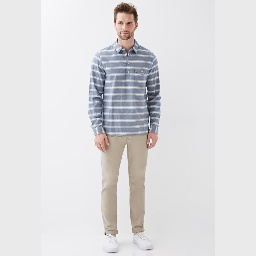

In [14]:
cv2_imshow(image)

**ResNET Architecture**

Read about ResNET architecture and advantage of residual blocks

Build a simple 6-layer ConvNET and train it on CIFAR-10 dataset

Introduce residual blocks in the above model and compare the results

Use the tensorflow library to import ResNET model with imgaenet weights

Change some parameters and document the results

Visualize the output of some layers and add/delete layers to see the effect of individual layers on the model accuracy

In [15]:
cifar_10=keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar_10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [16]:
x_train.shape

(50000, 32, 32, 3)

In [17]:
x_test.shape

(10000, 32, 32, 3)

In [18]:
y_test.shape

(10000, 1)

In [19]:
y_test[:5] 

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [20]:
# from tensorflow.keras.utils import to_categorical
# x_train=x_train.astype('float32')/255.0
# x_test=x_test.astype('float32')/255.0
# y_train=to_categorical(y_train)
# y_test=to_categorical(y_test)

In [21]:
model=keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    #keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    #keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    #keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(32,(2,2),activation='relu'),
    #keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(32,(2,2),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 32)        0

In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(x_train,y_train,epochs=5,batch_size=128,shuffle=True)

Epoch 1/5
391/391 [==============================] - 95s 241ms/step - loss: 2.3172 - accuracy: 0.1854
Epoch 2/5
391/391 [==============================] - 96s 245ms/step - loss: 1.8242 - accuracy: 0.3053
Epoch 3/5
391/391 [==============================] - 95s 242ms/step - loss: 1.6966 - accuracy: 0.3642
Epoch 4/5
391/391 [==============================] - 94s 241ms/step - loss: 1.6076 - accuracy: 0.4045
Epoch 5/5
391/391 [==============================] - 94s 241ms/step - loss: 1.5424 - accuracy: 0.4289


In [25]:
validation=model.fit(x_train,y_train,validation_data=(x_test,y_test),shuffle=True,epochs=5,batch_size=128)

Epoch 1/5
391/391 [==============================] - 111s 285ms/step - loss: 1.4760 - accuracy: 0.4602 - val_loss: 1.6023 - val_accuracy: 0.4436
Epoch 2/5
391/391 [==============================] - 109s 278ms/step - loss: 1.4235 - accuracy: 0.4780 - val_loss: 1.4422 - val_accuracy: 0.4854
Epoch 3/5
391/391 [==============================] - 110s 280ms/step - loss: 1.3816 - accuracy: 0.4963 - val_loss: 1.5473 - val_accuracy: 0.4579
Epoch 4/5
391/391 [==============================] - 107s 274ms/step - loss: 1.3393 - accuracy: 0.5151 - val_loss: 1.4295 - val_accuracy: 0.4958
Epoch 5/5
391/391 [==============================] - 110s 281ms/step - loss: 1.3082 - accuracy: 0.5260 - val_loss: 1.2981 - val_accuracy: 0.5456


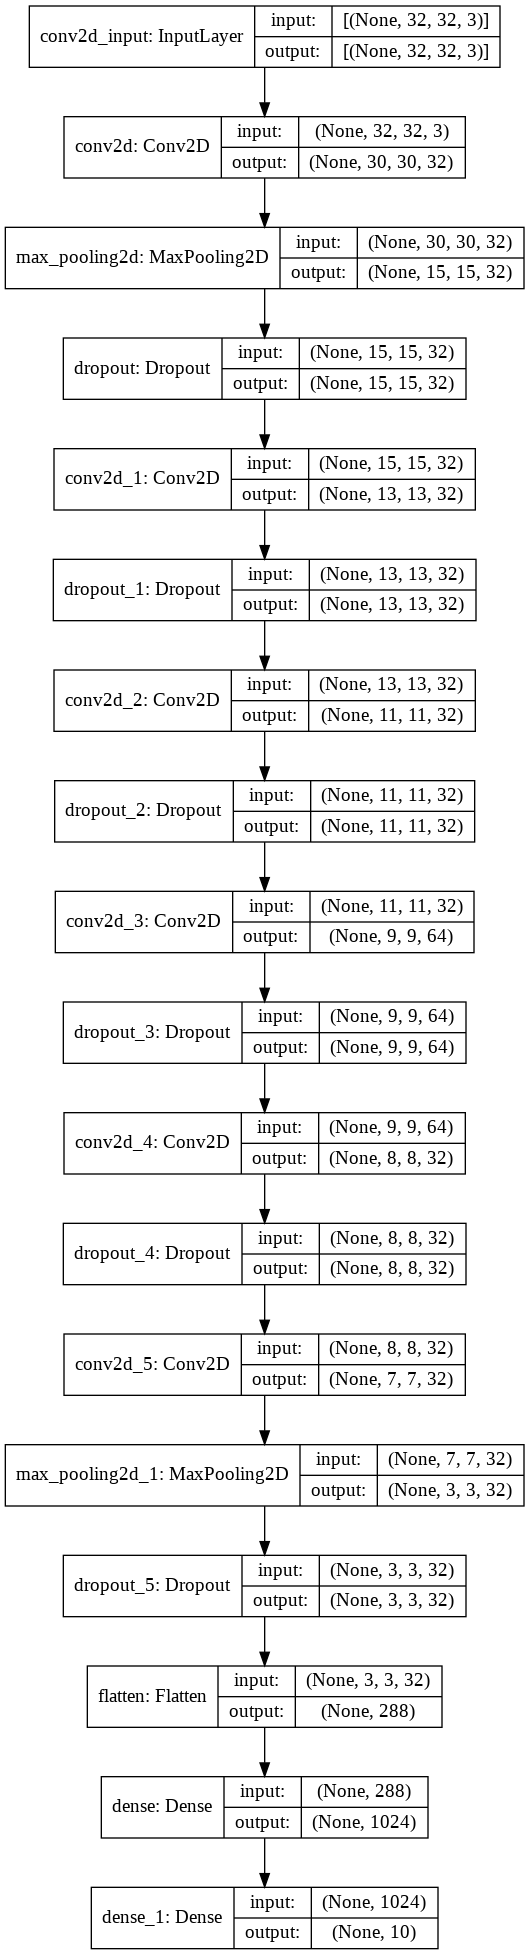

In [26]:
#from tensorflow.keras.utils import 
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=True)

In [31]:
resnet_model=keras.applications.resnet50.ResNet50(weights= 'imagenet',include_top=False,input_shape=(32,32,3))
output=resnet_model.output
output=keras.layers.GlobalAveragePooling2D()(output)
output=keras.layers.Dropout(0.5)(output)

In [34]:
predic=keras.layers.Dense(10,activation='softmax')(output)
model=keras.models.Model(inputs=resnet_model.input, outputs=predic)

In [41]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [45]:
res_model=model.fit(x_train,y_train,batch_size=128,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
391/391 [==============================] - 3546s 9s/step - loss: 1.4840 - accuracy: 0.5464 - val_loss: 1.8236 - val_accuracy: 0.4748
Epoch 2/5
 60/391 [===>..........................] - ETA: 50:06 - loss: 1.4235 - accuracy: 0.5721

KeyboardInterrupt: ignored